In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

# Подготовка датасета

## Выбор двух классов: versicolor и virginica

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target)
target.rename(columns={0: 'target'}, inplace=True)
data = data.merge(target, how='inner', left_index=True, right_index=True)
data_vv = data[data['target'] >= 1]
data_vv.target = data_vv.target.replace({1: 'versicolor', 2: 'virginica'})

data_to_regression = data_vv.copy()

/var/folders/tt/zvp76tps5831_lf3ld0v33pc0000gp/T/ipykernel_23994/364151573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vv.target = data_vv.target.replace({1: 'versicolor', 2: 'virginica'})


In [3]:
y = data_to_regression.target
del data_to_regression['target']

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
le.fit(y)

LabelEncoder()

In [6]:
y_ = np.array(pd.Series(data=le.transform(y)))

Получаем готовый датасет для дальнейшей работы.  
Его характеристики: 100 строк, 4 параметра.  
Отдельно выделяем Y (предсказание)

In [7]:
data_to_regression.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [8]:
X = np.array(data_to_regression)

## Создаем класс Логистической регрессии  
Исходя из определения логистической регрессии (линейная регрессия + сигмоида)

In [9]:
def sigmoid(L):
    """Функция сигмоиды"""
    return 1 / (1 + np.exp(-L))

In [12]:
def lin_reg(X, W0, W):
    """Линейная регрессия"""
    return W0 + np.sum(np.dot(X, W))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=42)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.coef_

array([-0.11325364, -0.12382787,  0.32713203,  0.26952252])

In [17]:
model.intercept_

0.5037019938445668

In [18]:
L = model.intercept_ + np.dot(model.coef_, X.T)

In [19]:
sigmoid(L)

array([0.49906218, 0.52083934, 0.5484083 , 0.56165974, 0.56356935,
       0.55617999, 0.55146628, 0.46094241, 0.51837801, 0.5433314 ,
       0.51387897, 0.53110888, 0.5020315 , 0.56537419, 0.46183103,
       0.49142434, 0.57336315, 0.47384657, 0.62052067, 0.49714002,
       0.61776059, 0.48946718, 0.6275407 , 0.54310787, 0.49710434,
       0.50506662, 0.55478442, 0.60667427, 0.56569243, 0.42822879,
       0.50082723, 0.47494936, 0.48580004, 0.6551638 , 0.58174253,
       0.53520779, 0.5371658 , 0.56704843, 0.50218666, 0.54316704,
       0.55754976, 0.54631121, 0.5051023 , 0.46597248, 0.54010701,
       0.49190753, 0.51719307, 0.50569023, 0.42947433, 0.51658792,
       0.78554083, 0.70421988, 0.72674446, 0.69892008, 0.75122356,
       0.76333932, 0.67487972, 0.7209556 , 0.73159363, 0.74484855,
       0.65113568, 0.69932564, 0.70482637, 0.72778142, 0.7593154 ,
       0.71344392, 0.67493493, 0.72277963, 0.82498904, 0.67375645,
       0.72821889, 0.700261  , 0.76937004, 0.65434485, 0.70161

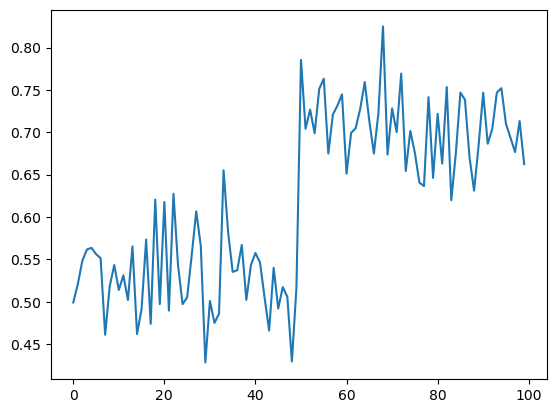

In [20]:
plt.plot(sigmoid(L))

In [32]:
def log_reg(X, W0, W):
    """Логистическая регрессия"""
    return sigmoid(lin_reg(X, W0, W))

In [33]:
def binary_entropy(y, X, W0, W):
    """Бинарная энтропия"""
    return (-1 / X.shape[0]) * np.sum( y * np.log(log_reg(X, W0, W) + (1 - y) * np.log(1 - log_reg(X, W0, W))))

In [34]:
def d_binary_entropy(y, X, W0, W):
    """Производная от бинарной энтропии"""
    return (1 / X.shape[0]) * np.dot(X.T, log_reg(X, W0, W) - y)

In [35]:
def GD(y, X, EPOCHS, LEARNING_RATE):
    """Градиентный спуск"""
    W = []
    np.random.seed(9)
    W = np.random.normal(size=(5,))

    list_params_gd = [W.copy()]
    
    for _ in range(EPOCHS):
        for i in range(len(W)):
            if i == 0:
                W[i] -= LEARNING_RATE * np.sum(W[0] + np.sum([W[j] * X.T[j-1] for j in range(1, len(W))]) - y) * (2/X.shape[0])
            else:
                W[i] -= LEARNING_RATE * np.sum((W[0] + np.sum([W[j] * X.T[j-1] for j in range(1, len(W))]) - y) * X.T[i-1]) * (2/X.shape[0])    

            list_params_gd.append(W.copy())
        
    return W


Находим веса

In [36]:
W = GD(y_, X, 20, .0001)
W

array([ 0.00310033, -0.28855546, -1.11545014, -0.01130991, -0.37670521])

In [37]:
W0, W = W[0], W[1:]

In [38]:
L_ = W0 + np.dot(W, X.T)

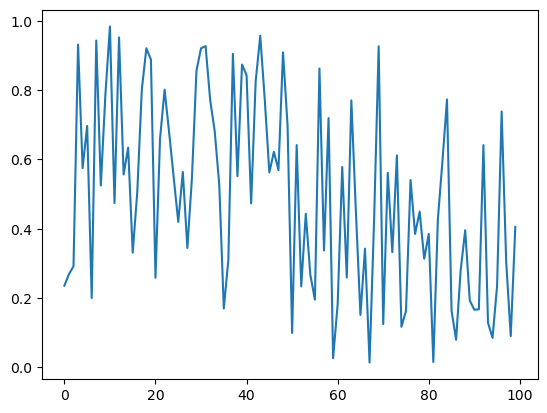

In [39]:
plt.plot(sigmoid(L_))

In [40]:
binary_entropy(y_, X, W0, W)

/var/folders/tt/zvp76tps5831_lf3ld0v33pc0000gp/T/ipykernel_23994/3224833765.py:3: RuntimeWarning: invalid value encountered in log
  return (-1 / X.shape[0]) * np.sum( y * np.log(log_reg(X, W0, W) + (1 - y) * np.log(1 - log_reg(X, W0, W))))


nan

In [41]:
log_reg(X, W0, W)

0.5007750827452265